In [69]:
import re
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

df = pd.read_csv("customerGroups.csv")
df.head()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
0,4.50,1,3,4,5,1,1,4,6,0,...,-0.383704,-0.065449,0.584000,0.488000,0,-3.232000,-1.944000,-0.007944,1.76,2
1,2.20,24,22,46,10,24,28,18,22,-4,...,-0.346839,-0.159744,-0.947614,0.463540,0,-5.342174,-1.321355,0.181064,1.85,1
2,12.00,7,4,11,18,8,11,2,10,-3,...,-2.673934,-1.592303,0.525305,-0.467169,0,-6.566521,-4.176403,-0.040277,2.05,2
3,1.91,8,5,13,14,6,7,6,9,-1,...,0.616027,0.404945,-1.506923,0.741964,0,-2.438120,-0.787132,-0.012101,1.82,0
4,2.50,23,16,39,14,33,25,18,27,8,...,-1.057214,-1.159294,0.751012,-0.182052,0,-1.259728,0.059574,0.042613,1.99,2


#### EDA

In [70]:
df.describe()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
count,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,...,6620.000000,6620.000000,6620.000000,6620.000000,6620.00000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000
mean,2.708779,14.424018,10.485650,24.909668,10.988066,13.412085,10.161027,10.745468,14.169033,3.251057,...,-0.029311,-0.006724,-0.004147,0.008827,0.00000,-0.228426,-0.103728,0.000408,1.917134,1.031722
std,1.857725,10.700787,8.384203,18.174948,5.635985,10.090030,7.495039,7.964247,9.866734,8.481210,...,1.220752,1.068199,0.663238,0.683422,0.32287,3.390902,1.944419,0.092761,0.302175,0.731042
min,1.050000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-27.000000,...,-4.684111,-4.319826,-2.512919,-3.118836,-2.00000,-15.202740,-9.181722,-0.750000,0.000000,0.000000
25%,1.667000,6.000000,4.000000,10.000000,6.000000,5.000000,4.000000,4.000000,6.000000,-2.000000,...,-0.716407,-0.531224,-0.440407,-0.406811,0.00000,-2.222226,-1.293471,-0.054331,1.710000,0.000000
50%,2.150000,13.000000,9.000000,22.000000,11.000000,12.000000,9.000000,9.000000,13.000000,1.000000,...,0.000000,0.000000,0.000000,0.001070,0.00000,-0.119378,-0.012487,0.000000,1.850000,1.000000
75%,2.800000,21.000000,15.000000,36.000000,16.000000,20.000000,15.000000,16.000000,21.000000,7.000000,...,0.654627,0.490504,0.410915,0.450104,0.00000,1.809334,1.035235,0.054825,2.020000,2.000000
max,23.000000,52.000000,47.000000,94.000000,20.000000,61.000000,43.000000,48.000000,52.000000,48.000000,...,4.821136,4.396281,2.987136,2.830550,2.00000,12.562698,8.209578,0.666667,4.330000,2.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6620 entries, 0 to 6619
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   g1_1    6620 non-null   float64
 1   g1_2    6620 non-null   int64  
 2   g1_3    6620 non-null   int64  
 3   g1_4    6620 non-null   int64  
 4   g1_5    6620 non-null   int64  
 5   g1_6    6620 non-null   int64  
 6   g1_7    6620 non-null   int64  
 7   g1_8    6620 non-null   int64  
 8   g1_9    6620 non-null   int64  
 9   g1_10   6620 non-null   int64  
 10  g1_11   6620 non-null   int64  
 11  g1_12   6620 non-null   int64  
 12  g1_13   6620 non-null   float64
 13  g1_14   6620 non-null   float64
 14  g1_15   6620 non-null   float64
 15  g1_16   6620 non-null   float64
 16  g1_17   6620 non-null   float64
 17  g1_18   6620 non-null   float64
 18  g1_19   6620 non-null   float64
 19  g1_20   6620 non-null   float64
 20  g1_21   6620 non-null   float64
 21  g2_1    6620 non-null   float64
 22  

In [72]:
target_counts = df['target'].value_counts(normalize=True)
target_counts

target
1    0.464653
2    0.283535
0    0.251813
Name: proportion, dtype: float64

In [73]:
pre_campaign_features = [col for col in df.columns if col not in ['g1_21', 'g2_21', 'c_28', 'target']]

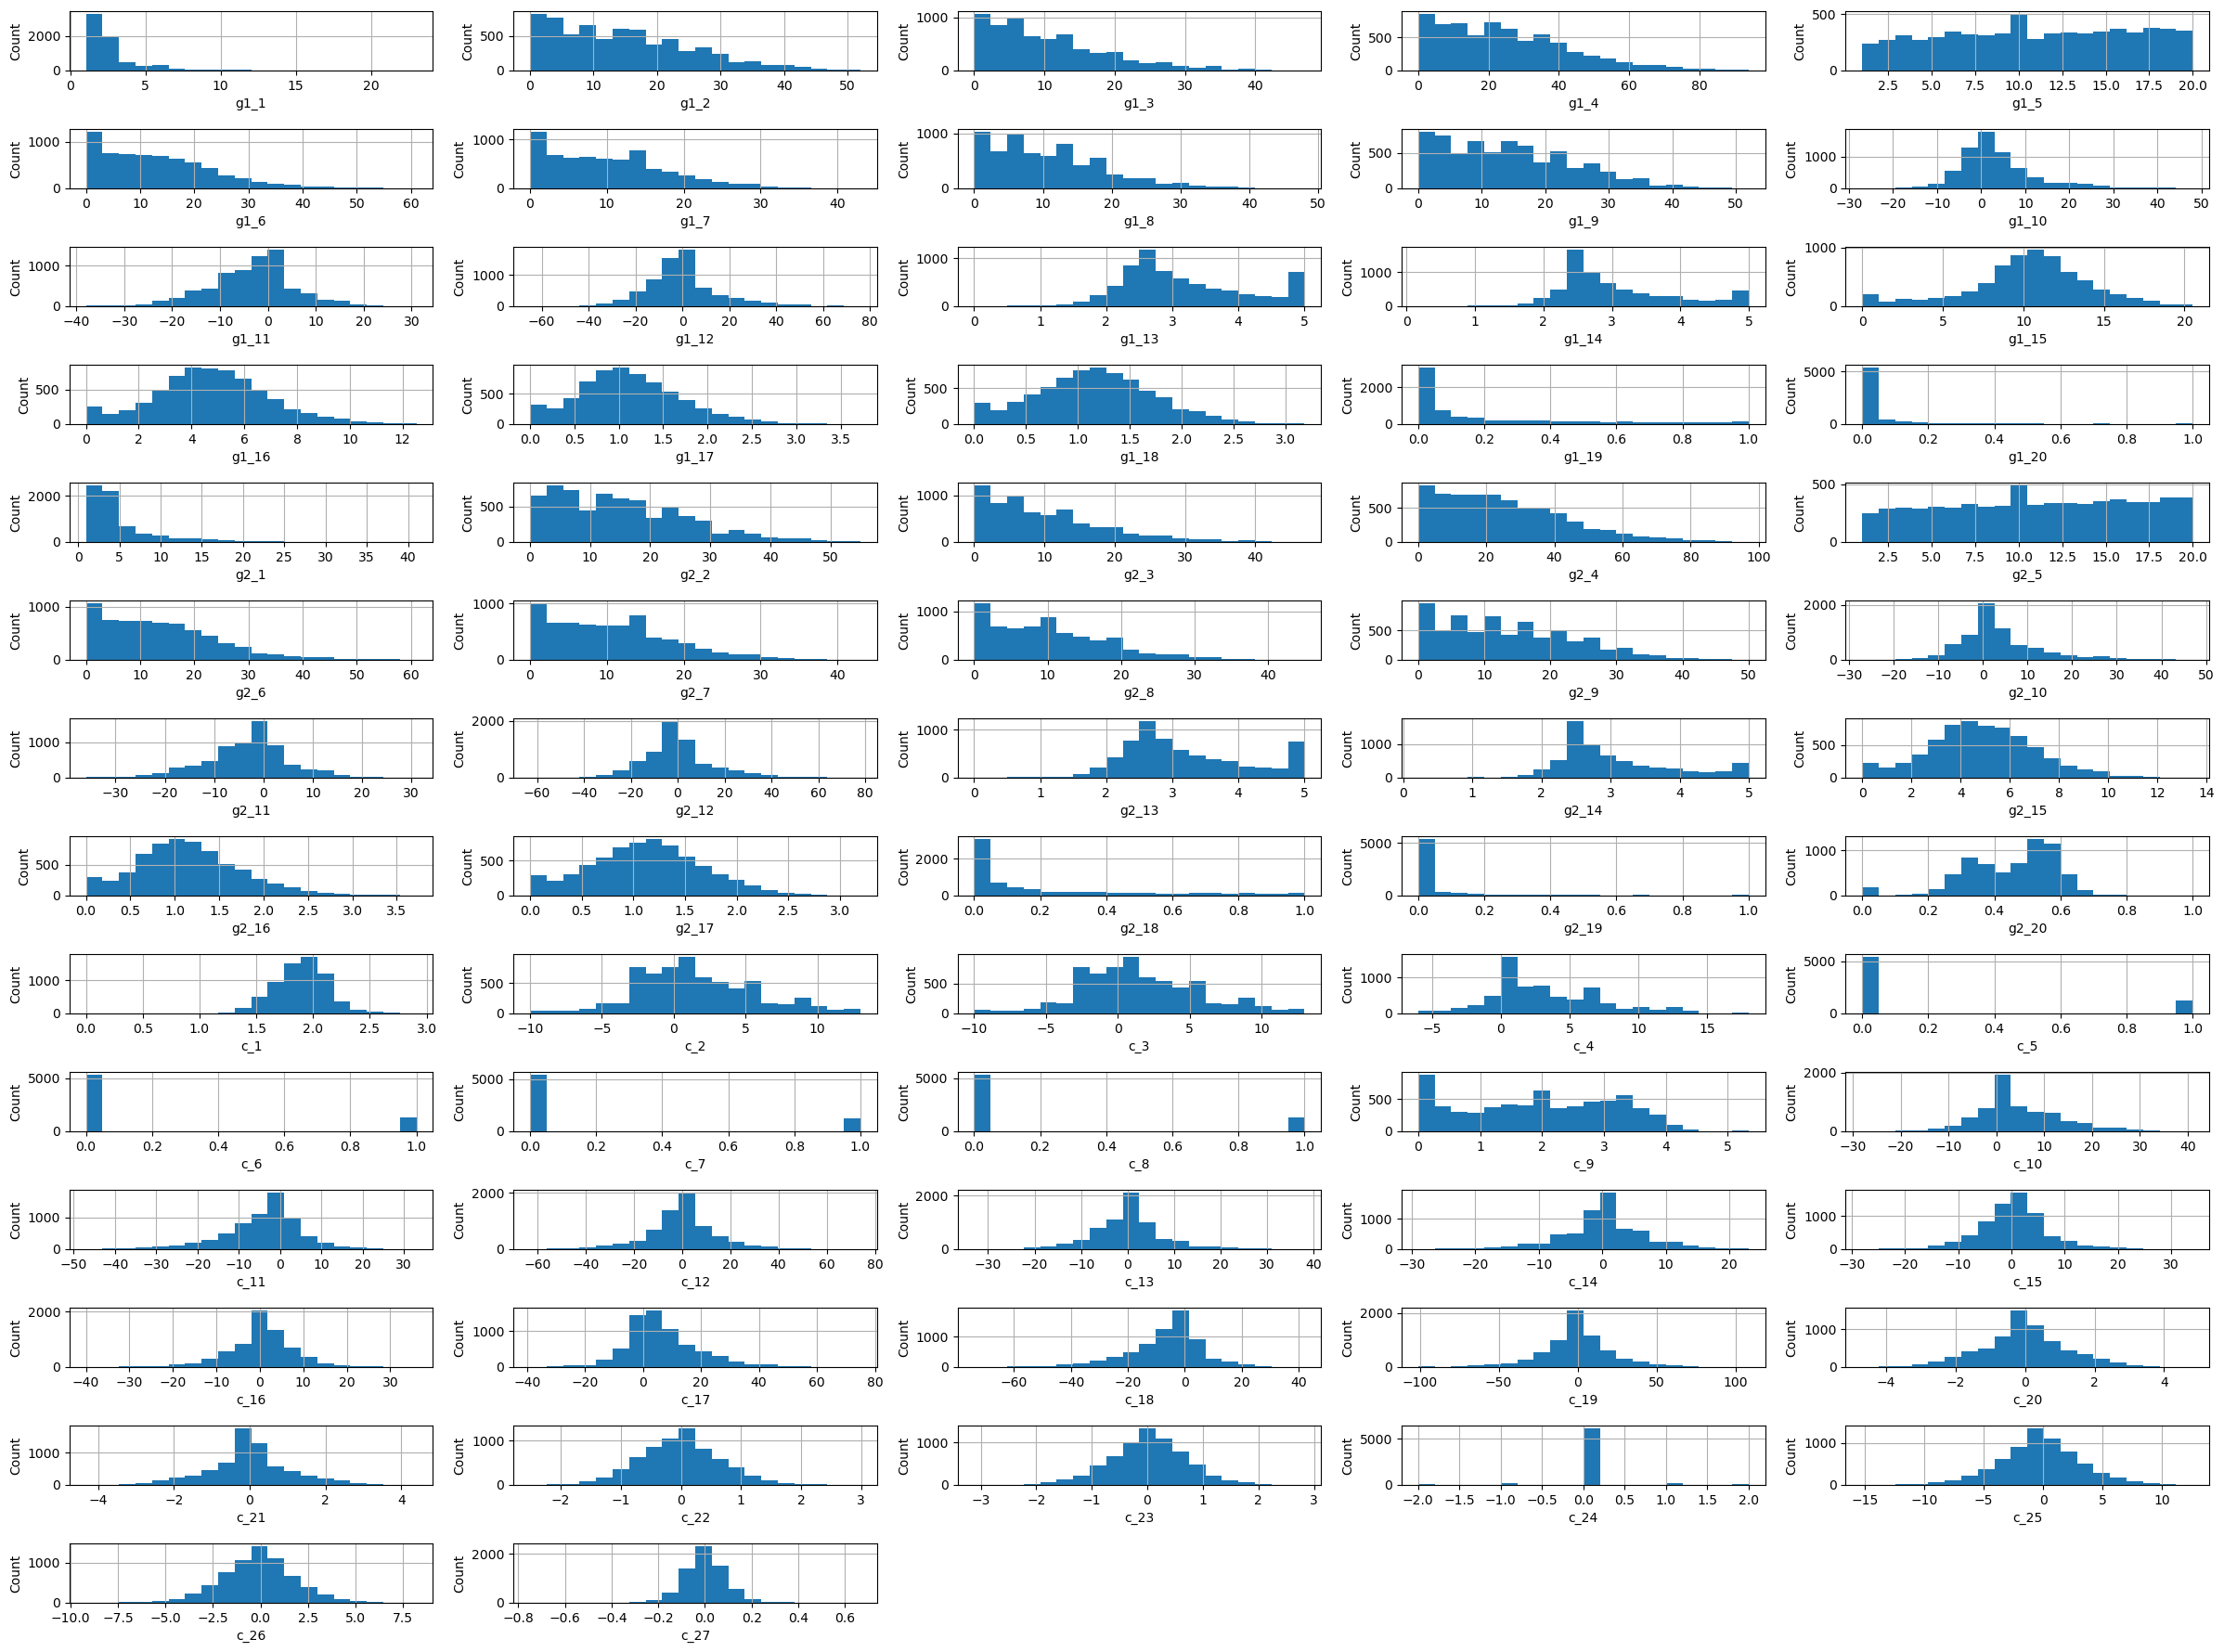

In [74]:
plt.figure(figsize=(24,20))
for i, column in enumerate(pre_campaign_features):
    plt.subplot(16, 5, i+1)
    fig = df[column].hist(bins=20)
    fig.set_xlabel(column)
    fig.set_ylabel('Count')

plt.tight_layout()
plt.show()

<Axes: >

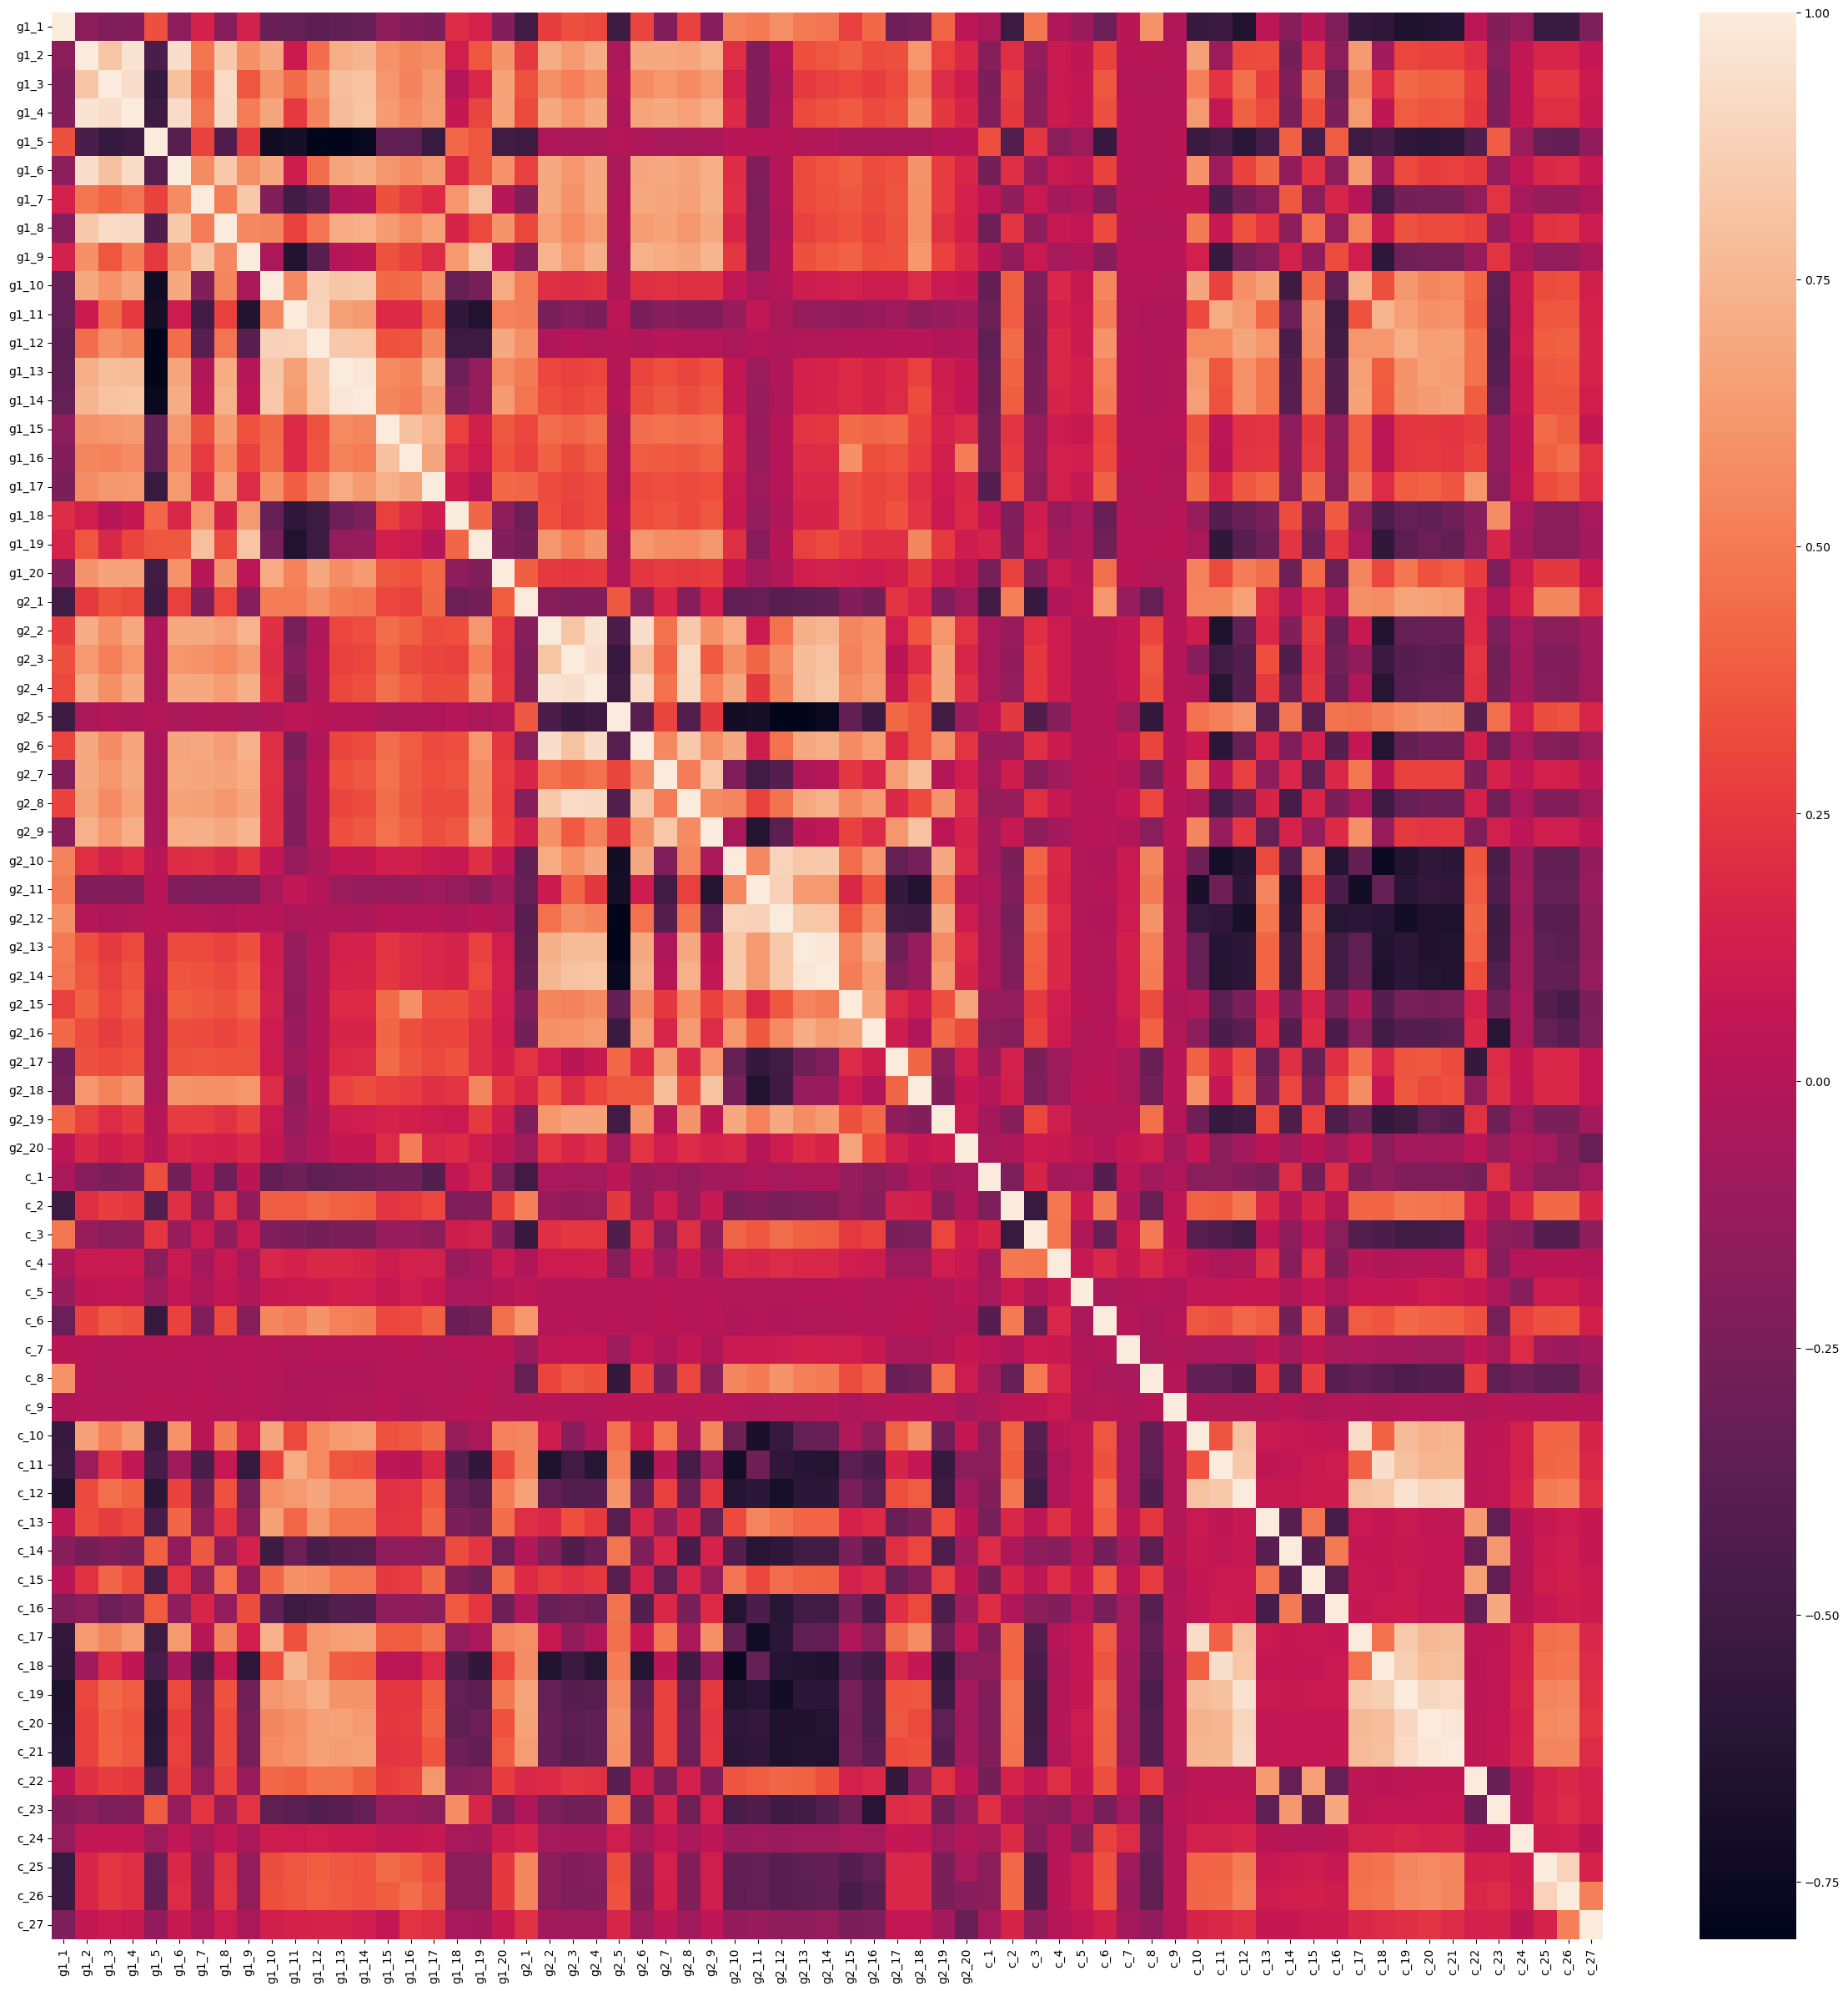

In [75]:
plt.figure(figsize=(30,30))
correlation_matrix = df[pre_campaign_features].corr(numeric_only=True)
sns.heatmap(correlation_matrix)

In [76]:
# Create a set to keep track of columns with high corr
columns_ = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            columns_.add(correlation_matrix.columns[j])

print("Columns:", columns_)

Columns: {'g1_4', 'g1_14', 'c_21', 'g1_8', 'c_20', 'c_18', 'g2_6', 'c_19', 'g1_6', 'c_17', 'g2_14', 'g2_4', 'g2_8'}


In [77]:
plt.figure(figsize=(30,30))
correlation_matrix = df[list(columns_)].corr(numeric_only=True)
correlation_matrix

,g1_4,g1_14,c_21,g1_8,c_20,c_18,g2_6,c_19,g1_6,c_17,g2_14,g2_4,g2_8
g1_4,1.000000,0.811958,0.359763,0.912525,0.355847,0.044266,0.671025,0.380195,0.924652,0.624118,0.347209,0.683314,0.658277
g1_14,0.811958,1.000000,0.648488,0.728758,0.633205,0.375007,0.327072,0.601707,0.709677,0.662817,0.161317,0.337584,0.330237
c_21,0.359763,0.648488,1.000000,0.317848,0.973881,0.792871,-0.300681,0.919250,0.274754,0.778239,-0.646643,-0.365940,-0.305409
g1_8,0.912525,0.728758,0.317848,1.000000,0.315338,0.079146,0.638255,0.347443,0.835760,0.529125,0.318179,0.637381,0.616017
c_20,0.355847,0.633205,0.973881,0.315338,1.000000,0.783913,-0.293523,0.905308,0.268835,0.763168,-0.628095,-0.360207,-0.298696
c_18,0.044266,0.375007,0.792871,0.079146,0.783913,1.000000,-0.627619,0.864498,-0.065712,0.460868,-0.652152,-0.615287,-0.503186
g2_6,0.671025,0.327072,-0.300681,0.638255,-0.293523,-0.627619,1.000000,-0.339521,0.680879,0.069270,0.717568,0.925793,0.836937
c_19,0.380195,0.601707,0.919250,0.347443,0.905308,0.864498,-0.339521,1.000000,0.313724,0.844493,-0.588831,-0.381201,-0.327169
g1_6,0.924652,0.709677,0.274754,0.835760,0.268835,-0.065712,0.680879,0.313724,1.000000,0.623938,0.354929,0.691825,0.663337
c_17,0.624118,0.662817,0.778239,0.529125,0.763168,0.460868,0.069270,0.844493,0.623938,1.000000,-0.344779,-0.017462,-0.041506


<Figure size 3000x3000 with 0 Axes>

#### Pipelines

In [78]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report

import catboost
from catboost import CatBoostClassifier

In [79]:
# X_ = df[list(set(pre_campaign_features)-set(columns_))]
X = df[pre_campaign_features]
y = df['target']

In [80]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, stratify=y, random_state=0)

In [81]:
num_features_pipeline = Pipeline([
    ('scale', MinMaxScaler()),
    ('transform', QuantileTransformer(output_distribution='normal'))
])

In [82]:
num_features_transformed = num_features_pipeline.fit_transform(X_train, y_train)
num_features_pipeline.named_steps

{'scale': MinMaxScaler(),
 'transform': QuantileTransformer(output_distribution='normal')}

In [83]:
num_features_transformed.shape

(5627, 67)

In [84]:
preprocessing_pipeline = Pipeline(
    steps=[
        ('num_preprocessing', num_features_pipeline)
    ]
)

In [85]:
from sklearn.base import BaseEstimator, ClassifierMixin


class CustomClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base):
        self.base = base

    def fit(self, X, y=None):
        self.base.fit(X, y)
        return self

    def predict(self, X, y=None):
        return self.base.predict(X)

    def predict_proba(self, X, y=None):
        return self.base.predict_proba(X)

    def fit_predict(self, X, y=None):
        self.fit(X, y)
        return self.predict(X)

    def fit_predict_proba(self, X, y=None):
        self.fit(X, y)
        return self.predict_proba(X)

    def score(self, X, y, sample_weight=None):
        return self.base.score(X, y, sample_weight)
    
    def decision_function(self, X):
        if hasattr(self.base, 'decision_function'):
            return self.base.decision_function(X)
        else:
            raise AttributeError(f"{self.base.__class__.__name__} does not have a decision_function method.")

In [86]:
classifier_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessing_pipeline),
        ('classify', CustomClassifier(SVC()))
    ]
)

In [87]:
classifier_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('num_preprocessing',
                                  Pipeline(steps=[('scale', MinMaxScaler()),
                                                  ('transform',
                                                   QuantileTransformer(output_distribution='normal'))]))])),
                ('classify', CustomClassifier(base=SVC()))])

In [88]:
y_pred_baseline = classifier_pipeline.predict(X_val)

In [89]:
print(classification_report(y_val, y_pred_baseline))

              precision    recall  f1-score   support

           0       0.43      0.04      0.07       250
           1       0.61      0.92      0.73       461
           2       0.59      0.58      0.58       282

    accuracy                           0.60       993
   macro avg       0.54      0.51      0.46       993
weighted avg       0.56      0.60      0.52       993



In [90]:
for key in classifier_pipeline.get_params().keys():
    if key.startswith("preprocessing"):
        print(key)

preprocessing
preprocessing__memory
preprocessing__steps
preprocessing__verbose
preprocessing__num_preprocessing
preprocessing__num_preprocessing__memory
preprocessing__num_preprocessing__steps
preprocessing__num_preprocessing__verbose
preprocessing__num_preprocessing__scale
preprocessing__num_preprocessing__transform
preprocessing__num_preprocessing__scale__clip
preprocessing__num_preprocessing__scale__copy
preprocessing__num_preprocessing__scale__feature_range
preprocessing__num_preprocessing__transform__copy
preprocessing__num_preprocessing__transform__ignore_implicit_zeros
preprocessing__num_preprocessing__transform__n_quantiles
preprocessing__num_preprocessing__transform__output_distribution
preprocessing__num_preprocessing__transform__random_state
preprocessing__num_preprocessing__transform__subsample


Use GridSearch for find best model and best preprocessing parametrs

In [91]:
param_grid = [
    {
        'preprocessing__num_preprocessing__scale': [
            MinMaxScaler(),
            MaxAbsScaler(),
            RobustScaler(),
            StandardScaler()
        ],
        'preprocessing__num_preprocessing__transform': [
            QuantileTransformer(output_distribution='normal'),
            PowerTransformer()
        ],
        'classify__base': [
            SVC(),
            DecisionTreeClassifier(),
            ExtraTreeClassifier(),
            RandomForestClassifier(),
            GradientBoostingClassifier(),
            AdaBoostClassifier()
        ]
    }
]

In [92]:
grid = GridSearchCV(classifier_pipeline, param_grid=param_grid, cv=4, scoring='accuracy', verbose=3, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
[CV 1/4] END classify__base=SVC(), preprocessing__num_preprocessing__scale=MinMaxScaler(), preprocessing__num_preprocessing__transform=QuantileTransformer(output_distribution='normal');, score=0.552 total time=   6.6s
[CV 1/4] END classify__base=SVC(), preprocessing__num_preprocessing__scale=MaxAbsScaler(), preprocessing__num_preprocessing__transform=QuantileTransformer(output_distribution='normal');, score=0.552 total time=   6.7s
[CV 2/4] END classify__base=SVC(), preprocessing__num_preprocessing__scale=MinMaxScaler(), preprocessing__num_preprocessing__transform=QuantileTransformer(output_distribution='normal');, score=0.559 total time=   7.0s
[CV 2/4] END classify__base=SVC(), preprocessing__num_preprocessing__scale=MinMaxScaler(), preprocessing__num_preprocessing__transform=PowerTransformer();, score=0.571 total time=   7.0s
[CV 3/4] END classify__base=SVC(), preprocessing__num_preprocessing__scale=MinMaxScaler(), prepro

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('num_preprocessing',
                                                         Pipeline(steps=[('scale',
                                                                          MinMaxScaler()),
                                                                         ('transform',
                                                                          QuantileTransformer(output_distribution='normal'))]))])),
                                       ('classify',
                                        CustomClassifier(base=SVC()))]),
             n_jobs=-1,
             param_grid=[{'classify__base': [SVC(), DecisionTreeClassifier(),
                                             ExtraTreeClassifier(),
                                             RandomForestClassifier(),
                                             GradientBoostingClassifier(),
                                             AdaBoostClassifier()],
                          'preprocessing__num_preprocessing__scale': [MinMaxScaler(),
                                                                      MaxAbsScaler(),
                                                                      RobustScaler(),
                                                                      StandardScaler()],
                          'preprocessing__num_preprocessing__transform': [QuantileTransformer(output_distribution='normal'),
                                                                          PowerTransformer()]}],
             scoring='accuracy', verbose=3)

In [93]:
grid.best_estimator_

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('num_preprocessing',
                                  Pipeline(steps=[('scale', MaxAbsScaler()),
                                                  ('transform',
                                                   QuantileTransformer(output_distribution='normal'))]))])),
                ('classify',
                 CustomClassifier(base=GradientBoostingClassifier()))])

In [94]:
y_pred_gbc = grid.best_estimator_.predict(X_val)

In [95]:
print(classification_report(y_val, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.31      0.11      0.16       250
           1       0.65      0.85      0.74       461
           2       0.59      0.62      0.60       282

    accuracy                           0.60       993
   macro avg       0.52      0.53      0.50       993
weighted avg       0.55      0.60      0.56       993



Use GridSearch for tune parametrs for best model(`GradientBoostingClassifier`) 

In [96]:
best_params = grid.best_params_
new_param_grid = {
    'preprocessing__num_preprocessing__scale': [best_params['preprocessing__num_preprocessing__scale']],
    'preprocessing__num_preprocessing__transform': [best_params['preprocessing__num_preprocessing__transform']],
    'classify': [GradientBoostingClassifier()],
    'classify__learning_rate': [0.05, 0.07, 0.1],
    'classify__max_depth': [3, 4, 5],
    'classify__min_samples_leaf': [1, 2, 3],
}

# Perform a new grid search with the modified parameter grid
new_grid = GridSearchCV(classifier_pipeline, param_grid=new_param_grid, cv=4, scoring='accuracy', verbose=3, n_jobs=-1)
new_grid.fit(X_train, y_train)

best_estimator = new_grid.best_estimator_

Fitting 4 folds for each of 27 candidates, totalling 108 fits
[CV 1/4] END classify=GradientBoostingClassifier(), classify__learning_rate=0.05, classify__max_depth=3, classify__min_samples_leaf=3, preprocessing__num_preprocessing__scale=MaxAbsScaler(), preprocessing__num_preprocessing__transform=QuantileTransformer(output_distribution='normal');, score=0.585 total time=  14.9s
[CV 4/4] END classify=GradientBoostingClassifier(), classify__learning_rate=0.05, classify__max_depth=3, classify__min_samples_leaf=2, preprocessing__num_preprocessing__scale=MaxAbsScaler(), preprocessing__num_preprocessing__transform=QuantileTransformer(output_distribution='normal');, score=0.592 total time=  15.1s
[CV 2/4] END classify=GradientBoostingClassifier(), classify__learning_rate=0.05, classify__max_depth=3, classify__min_samples_leaf=1, preprocessing__num_preprocessing__scale=MaxAbsScaler(), preprocessing__num_preprocessing__transform=QuantileTransformer(output_distribution='normal');, score=0.582 tot

In [97]:
new_grid.best_estimator_

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('num_preprocessing',
                                  Pipeline(steps=[('scale', MaxAbsScaler()),
                                                  ('transform',
                                                   QuantileTransformer(output_distribution='normal'))]))])),
                ('classify', GradientBoostingClassifier(learning_rate=0.07))])

In [98]:
y_pred_gbc_ft = new_grid.best_estimator_.predict(X_val)

In [99]:
print(classification_report(y_val, y_pred_gbc_ft))

              precision    recall  f1-score   support

           0       0.32      0.11      0.17       250
           1       0.65      0.86      0.74       461
           2       0.58      0.62      0.60       282

    accuracy                           0.60       993
   macro avg       0.52      0.53      0.50       993
weighted avg       0.55      0.60      0.56       993



#### XGBoost

In [100]:
import xgboost

best_params = new_grid.best_params_
xgb_param_grid = {
    'preprocessing__num_preprocessing__scale': [best_params['preprocessing__num_preprocessing__scale']],
    'preprocessing__num_preprocessing__transform': [best_params['preprocessing__num_preprocessing__transform']],
    'classify': [xgboost.XGBClassifier(objective='multi:softmax')],
    'classify__learning_rate': [0.05, 0.07, 0.1],
    'classify__max_depth': [3, 4, 6],
    'classify__n_estimators': [200, 500],
}


# Perform a new grid search with the modified parameter grid
xgb_grid = GridSearchCV(classifier_pipeline, param_grid=xgb_param_grid, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 3/3] END classify=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...), classify__learning_rate=0.05, classify__max_depth=3, classify__n_estimators=200, preprocessing__num_preprocessing__scale=MaxAbsScaler(), preprocessing

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('num_preprocessing',
                                                         Pipeline(steps=[('scale',
                                                                          MinMaxScaler()),
                                                                         ('transform',
                                                                          QuantileTransformer(output_distribution='normal'))]))])),
                                       ('classify',
                                        CustomClassifier(base=SVC()))]),
             n_jobs=-1,
             param_grid={'classify': [XGBClassifier(base_score=None,
                                                    booster=None,
                                                    callbacks=None,
                                                    colsa...
                                                    n_jobs=None,
                                                    num_parallel_tree=None,
                                                    objective='multi:softmax', ...)],
                         'classify__learning_rate': [0.05, 0.07, 0.1],
                         'classify__max_depth': [3, 4, 6],
                         'classify__n_estimators': [200, 500],
                         'preprocessing__num_preprocessing__scale': [MaxAbsScaler()],
                         'preprocessing__num_preprocessing__transform': [QuantileTransformer(output_distribution='normal')]},
             scoring='accuracy', verbose=3)

In [101]:
xgb_grid.best_estimator_

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('num_preprocessing',
                                  Pipeline(steps=[('scale', MaxAbsScaler()),
                                                  ('transform',
                                                   QuantileTransformer(output_distribution='normal'))]))])),
                ('classify',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_round...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softmax', ...))])

In [102]:
y_pred_xgb = xgb_grid.best_estimator_.predict(X_val)

In [103]:
print(classification_report(y_val, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.33      0.10      0.16       250
           1       0.65      0.87      0.74       461
           2       0.59      0.63      0.61       282

    accuracy                           0.61       993
   macro avg       0.52      0.53      0.50       993
weighted avg       0.55      0.61      0.56       993



#### CatBoost

In [104]:
# Initialize CatBoostClassifier
cb_model = CatBoostClassifier(
    iterations=500,
    auto_class_weights='Balanced',
    eval_metric='Accuracy',
    verbose=100
)

In [105]:
cb_model.fit(X_train, y_train)
y_pred_cb = cb_model.predict(X_val)

Learning rate set to 0.155224
0:	learn: 0.5180482	total: 16.2ms	remaining: 8.11s
100:	learn: 0.6746225	total: 864ms	remaining: 3.41s
200:	learn: 0.7873017	total: 1.66s	remaining: 2.47s
300:	learn: 0.8708690	total: 2.46s	remaining: 1.63s
400:	learn: 0.9168710	total: 3.24s	remaining: 800ms
499:	learn: 0.9513034	total: 4.03s	remaining: 0us


In [106]:
print(classification_report(y_val, y_pred_cb))

              precision    recall  f1-score   support

           0       0.31      0.25      0.28       250
           1       0.69      0.72      0.70       461
           2       0.55      0.60      0.58       282

    accuracy                           0.57       993
   macro avg       0.52      0.53      0.52       993
weighted avg       0.55      0.57      0.56       993



In [107]:
train_pool = catboost.Pool(X_train, y_train)
val_pool = catboost.Pool(X_val)

In [108]:
cb_model_ft = CatBoostClassifier(
    iterations=500,
    auto_class_weights='Balanced',
    eval_metric='Accuracy',
    verbose=100
)

In [109]:
cb_grid = {
    'learning_rate': [0.03, 0.05, 0.1],
    'depth':[4, 5, 6],
    'l2_leaf_reg': [1, 3, 4, 6]
}
cb_grid_search_results = cb_model_ft.grid_search(cb_grid, train_pool, shuffle=False, verbose=3, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5094508	test: 0.5244671	best: 0.5244671 (0)	total: 15.1ms	remaining: 7.52s
100:	learn: 0.5478045	test: 0.5451050	best: 0.5550820 (30)	total: 441ms	remaining: 1.74s
200:	learn: 0.5608865	test: 0.5444017	best: 0.5550820 (30)	total: 748ms	remaining: 1.11s
300:	learn: 0.5747831	test: 0.5504952	best: 0.5550820 (30)	total: 1.06s	remaining: 701ms
400:	learn: 0.5974723	test: 0.5590735	best: 0.5631287 (366)	total: 1.39s	remaining: 344ms
499:	learn: 0.6157486	test: 0.5543672	best: 0.5631287 (366)	total: 1.7s	remaining: 0us

bestTest = 0.5631286927
bestIteration = 366

0:	loss: 0.5631287	best: 0.5631287 (0)	total: 1.75s	remaining: 1m 1s
0:	learn: 0.5094508	test: 0.5244671	best: 0.5244671 (0)	total: 3.31ms	remaining: 1.65s
100:	learn: 0.5610447	test: 0.5497594	best: 0.5524004 (28)	total: 313ms	remaining: 1.24s
200:	learn: 0.5839130	test: 0.5597302	best: 0.5597302 (199)	total: 612ms	remaining: 910ms
300:	learn: 0.6106201	test: 0.5628195	best: 0.5639961 (296)	total: 891ms	remaining: 589m

In [110]:
y_pred_cb_finetune = cb_model_ft.predict(X_val)

In [111]:
print(classification_report(y_val, y_pred_cb_finetune))

              precision    recall  f1-score   support

           0       0.28      0.25      0.27       250
           1       0.70      0.70      0.70       461
           2       0.58      0.63      0.60       282

    accuracy                           0.57       993
   macro avg       0.52      0.53      0.52       993
weighted avg       0.56      0.57      0.57       993



Based on the provided metrics, the Gradient Boosting Classifier (GBC) models show the best overall performance. The baseline with SVC has very low f1 for `0` class, the GBC improve this value and at the end param-tuned GBC show the best result for all classes. CatBoost models have the highest f1 score for `0` label class but lower for class `1` and `2`. 

To further refine the pipelines, dropping highly correlated values is crucial. High correlation between variables can introduce redundancy and potentially skew model results. By removing such correlations, we enhance the model's accuracy and ensure it's not overly influenced by similar or duplicate information.

In [112]:
best_pipeline = new_grid.best_estimator_

#### Save Pipeline for deploy model
Make an inference pipeline with best model and best preprocessing setting, then save pipeline to `pkl` file for using it in `FastAPI` app.

In [115]:
inference_pipeline = Pipeline(
    steps=[
        ('preprocessing', best_pipeline['preprocessing']),
        ('classify', best_pipeline['classify'])
    ]
)

In [116]:
inference_pipeline

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('num_preprocessing',
                                  Pipeline(steps=[('scale', MaxAbsScaler()),
                                                  ('transform',
                                                   QuantileTransformer(output_distribution='normal'))]))])),
                ('classify', GradientBoostingClassifier(learning_rate=0.07))])

In [117]:
import joblib

# Save the best estimator
best_model = new_grid.best_estimator_
joblib.dump(best_model, 'gradient_boosting_tune.pkl')

['gradient_boosting_tune.pkl']

In [118]:
inference_pipeline = joblib.load('gradient_boosting_tune.pkl')

In [119]:
feature = X.iloc[1].values.reshape(1, -1)
prediction = inference_pipeline.predict(feature)
int(prediction[0])

1

In [120]:
import sklearn
sklearn.__version__

'1.2.2'